In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as inter

Наша задача, посчитать следующий интеграл:
$$
    \int_{a}^{b} f(x) sinkx dx
$$
Где функция $f(x)$ задана сеточно

In [20]:
x_data = np.array([-0.4,-0.1,0.2,0.5,0.8])
fx_data = np.array([1.9823,1.6710,1.3694,1.0472,0.6436])
cs = inter.CubicSpline(x_data,fx_data,bc_type='natural')

In [21]:
type(cs)

scipy.interpolate._cubic.CubicSpline

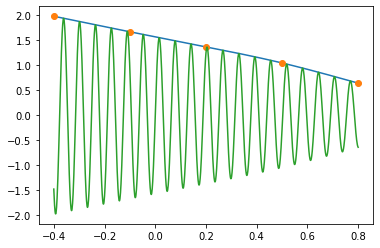

In [22]:
x_plot = np.arange(-0.4,0.8,0.001)

plt.plot(x_plot,cs(x_plot))
plt.plot(x_data,fx_data, 'o')
plt.plot(x_plot,cs(x_plot)*np.sin(100*x_plot))
plt.show()

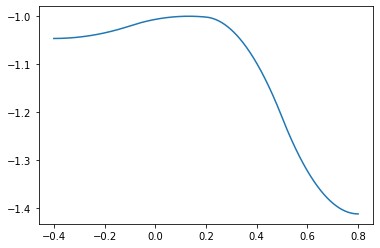

In [23]:
x_plot = np.arange(-0.4,0.8,0.001)

plt.plot(x_plot,cs(x_plot,1))
plt.show()

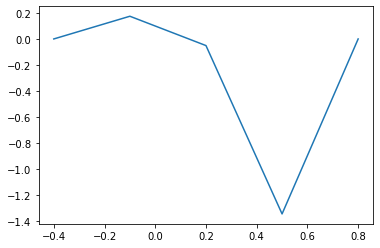

In [24]:
x_plot = np.arange(-0.4,0.8,0.001)

plt.plot(x_plot,cs(x_plot,2))
plt.show()

Сверху нарисован график первой, второй производной для нашего сплайна. Пусть наш сплайн это функция $g$,тогда  $\| g''\| \leqslant 1.5$$\|g'\| \leqslant 1.1$, а $\|g \| \leqslant 2$
$$
    \|(g(x)*sinkx)''\| = k^2\|g\| + 2k \|g'\| +k^2\|g\| \leqslant 
$$

In [33]:
1.5 + 2*100*1.1 + 2*10000

20221.5

Опять будем использовать интегрирование по прямоугольникам:
$$
h \leqslant \sqrt\frac{12 \varepsilon}{1.2\cdot 20221.5} \approx 0.0071
$$
Возьмем в качестве $h = 10^{-4}$

In [28]:
math.sqrt(12*10**(-3)/(1.2*20221.5))

0.0007032234040806534

In [29]:
def int_rectangle_medium(f,a,b,h):
    x = np.arange(a,b,h)
    summ = 0
    for i in range(x.size-1):
        summ += f(x[i] + h/2)
    summ *= h
    return summ

In [30]:
def func(x):
    return cs(x)*math.sin(100*x)

In [31]:
print(int_rectangle_medium(func,-0.4,0.8,10**(-4)))

-0.012447913824371442
